In [78]:
!pip install opencv-python
!pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip3 install --upgrade pip
Reshimming asdf python...

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip3 install --upgrade pip
Reshimming asdf python...


In [79]:
# Import opencv
import cv2 
# Import matplotlib
import matplotlib.pyplot as plt

In [80]:
config_file = 'arquivo_de_configuracao.pbtxt'#Arquivo de texto que possui as informaçoes da rede neural
frozen_model = 'frozen_model.pb'#Arquivo binario com os pesos treinados da rede neural 

In [8]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)#Cria um modelo de detecção de objetos

In [9]:
model.setInputSize(320,320)#Ajusta o tamanho da imagem
model.setInputScale(1.0/127.5)#Seta o valor de escala da imagem
model.setInputMean((127.5,127.5,127.5))#Valores medios que são subtraidos dos canais de cores 
model.setInputSwapRB(True)#Troca o filtro de cor para BGR ao inves de RGB

< cv2.dnn.Model 0x7f514e850f50>

In [10]:
classLabels = []#Array com as labels
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:#Salvando os valores do arquivo de texto no array
    classLabels = fpt.read().rstrip('\n').split('\n')

In [11]:
print(classLabels)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', '', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', '', 'backpack', 'umbrella', '', '', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', '', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', '', 'diningtable', '', '', 'toilet', '', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', '', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# 3. Identificando em imagem 

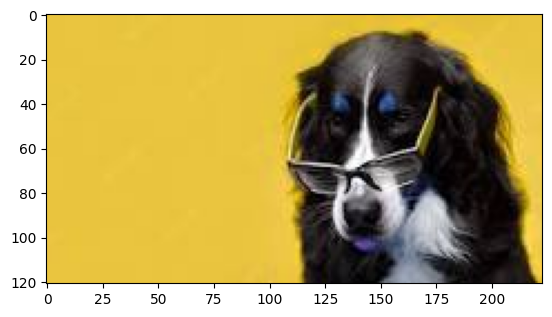

In [98]:
img = cv2.imread('dog.jfif') # Opencv lendo a imagem
plt.imshow(img) # imagem em BGR

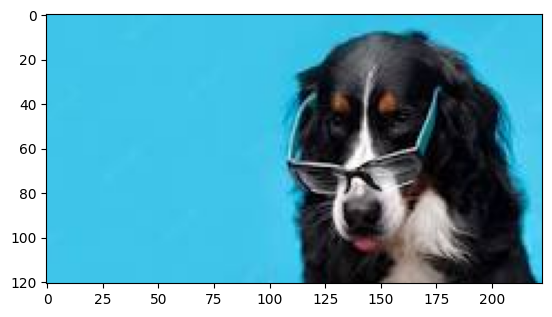

In [99]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Imagem normal

In [100]:
ClassIndex, confidece, bbox =model.detect(img,confThreshold = 0.4)

In [101]:
print(ClassIndex)
print(confidece)

[ 1 18]
[0.6151612 0.5971415]


In [102]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):#Configurando os quadrados de marcação
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = 1,color=(0,255,0), thickness =1)

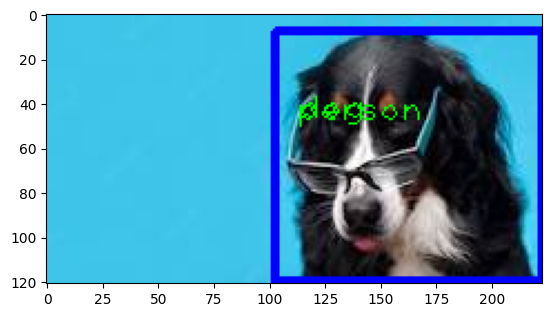

In [103]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
